In [10]:
# Importing relevant packages
import numpy as np
import pandas as pd
import os, sys
import pickle
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from scipy import stats as stats

## path to the downloaded gutenberg corpus
path_gutenberg = os.path.join(os.pardir,os.pardir,'gutenberg')

## import internal helper functions
src_dir = os.path.join(os.pardir,'src')
sys.path.append(src_dir)

# Accessing the metadata
sys.path.append(os.path.join(path_gutenberg,'src'))
from metaquery import meta_query
mq = meta_query(path=os.path.join(path_gutenberg,'metadata','metadata.csv'), filter_exist=False)


In [11]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'axes.titlesize':12,
          'axes.labelsize': 12,
          'legend.fontsize': 8,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'xtick.direction':'out',
          'ytick.direction':'out',
          'axes.spines.right' : True,
          'axes.spines.top' : True
         }
plt.rcParams.update(params)

from matplotlib import rc
rc('text', usetex=True)

In [12]:
def create_avg_se_dict(weights = False):
    if weights:
        string = '_weights'
    else:
        string = ''

    dataframe_dict = {}
    dataframe_dict_controlled = {}

    task_numbers = [i for i in range(11,21)]
    alphas = [i/20 for i in range(41)]
    col_names = [str(i) for i in alphas]

    for task in ['author', 'subject', 'time']:
        dataframe_list = []
        dataframe_list_controlled = []

        for num in task_numbers:
            input_file_path_opt_alpha_controlled = f'../output_files/optimal_alpha{string}_new_controlled_{task}{num}.pickle'
            with open(input_file_path_opt_alpha_controlled, 'rb') as f:
                opt_alpha_results_controlled = pickle.load(f)

            input_file_path_opt_alpha = f'../output_files/optimal_alpha{string}_new_{task}{num}.pickle'
            with open(input_file_path_opt_alpha, 'rb') as f:
                opt_alpha_results = pickle.load(f)
            
            dataframe_list.append(opt_alpha_results.copy())
            dataframe_list_controlled.append(opt_alpha_results_controlled.copy())
        
        df = pd.DataFrame(dataframe_list, columns=col_names)
        df_controlled = pd.DataFrame(dataframe_list_controlled, columns=col_names)

        alpha_avgs = []
        alpha_stds = []

        alpha_avgs_controlled = []
        alpha_stds_controlled = []

        for alpha in col_names:
            current = df[alpha].to_numpy()
            alpha_avgs.append(np.mean(current))
            alpha_stds.append(np.std(current))

            current_controlled = df_controlled[alpha].to_numpy()
            alpha_avgs_controlled.append(np.mean(current_controlled))
            alpha_stds_controlled.append(np.std(current_controlled))
        
        dataframe_dict[task] = (tuple(alpha_avgs), tuple(alpha_stds))
        dataframe_dict_controlled[task] = (tuple(alpha_avgs_controlled), tuple(alpha_stds_controlled))
    
    return dataframe_dict_controlled, dataframe_dict

## Figure 1

/var/folders/km/9ttg7bls33d_8n560hhmbnr00000gn/T/ipykernel_16034/3230961398.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


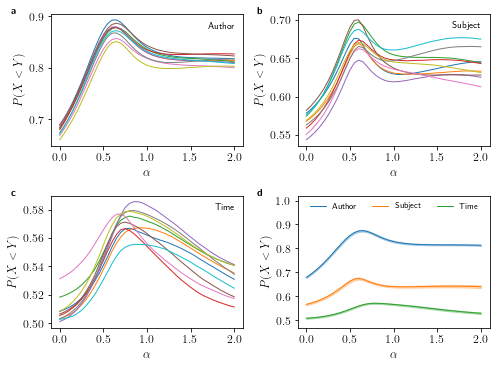

In [13]:
fig, axes = plt.subplots(2,2, figsize=(7,5.2), tight_layout=True)

axes_map = {'author':(0,0),'subject':(0,1),'time':(1,0)}
for task in axes_map:
    i,j = axes_map[task]
    ax = axes[i][j]
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$P(X<Y)$')
    ax.tick_params(labelleft=True)
    # if task == 'subject':
    #     ax2.annotate(r'\textbf{b}',xy=(-0.24,1.0),xycoords = 'axes fraction',)
    # else:
    #     ax2.annotate(r'\textbf{b}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
    tests = [i for i in range(11,21)]
    alphas = [i/20 for i in range(41)]
    
    # Create a figure for each test
    for test in tests:
        input_file_path_opt_alpha = f'../output_files/optimal_alpha_new_{task}{test}.pickle'
        with open(input_file_path_opt_alpha, 'rb') as f:
            opt_alpha_results = pickle.load(f)
        
        ax.plot(alphas, opt_alpha_results, lw=1)
    
    ycoord = 0.89
    if task == 'author':
        ax.annotate(r'\textbf{a}',xy=(-0.21,1.0),xycoords = 'axes fraction',)
        ax.annotate(r'Author',xy=(0.82,ycoord),xycoords = 'axes fraction',fontsize=9)
    elif task == 'subject':
        ax.annotate(r'\textbf{b}',xy=(-0.21,1.0),xycoords = 'axes fraction',)
        ax.annotate(r'Subject',xy=(0.805,ycoord),xycoords = 'axes fraction',fontsize=9)
    if task == 'time':
        ax.annotate(r'\textbf{c}',xy=(-0.21,1.0),xycoords = 'axes fraction',)
        ax.annotate(r'Time',xy=(0.855,ycoord),xycoords = 'axes fraction',fontsize=9)

    
ax = axes[1][1]

dataframe_dict_controlled, dataframe_dict = create_avg_se_dict()

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$P(X<Y)$')
ax.tick_params(labelleft=True)
ax.annotate(r'\textbf{d}',xy=(-0.21,1.0),xycoords = 'axes fraction',)
ax.yaxis.set_ticks([0.5,0.6,0.7,0.8,0.9,1])
ax.set_ylim(bottom = 0.47, top=1.02)

tests = [i for i in range(11,21)]
alphas = [i/20 for i in range(41)]

colours = {'author':'C0', 'subject':'C1', 'time':'C2'}
orders = {'author':1, 'subject':3, 'time':2}
for task in ['author','subject', 'time']:
    current = dataframe_dict[task]
    # ax2.errorbar(alphas, current[0], yerr=current[1], label = task)
    ax.plot(alphas, current[0], label = task.title(), lw=1)
    ax.fill_between(alphas, np.array(current[0]) - np.array(current[1])/np.sqrt(10), 
                    np.array(current[0]) + np.array(current[1])/np.sqrt(10), 
                    color=colours[task], alpha=0.3, zorder = orders[task])
ax.legend(ncol=3, loc = 9, frameon=False)

fig.show()

# fig.savefig("../figures/optimal_alpha_uncontrolled.pdf")

### Same as Figure 1, but for uncontrolled corpora (discussed but not shown in manuscript)

/var/folders/km/9ttg7bls33d_8n560hhmbnr00000gn/T/ipykernel_16034/1944130558.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


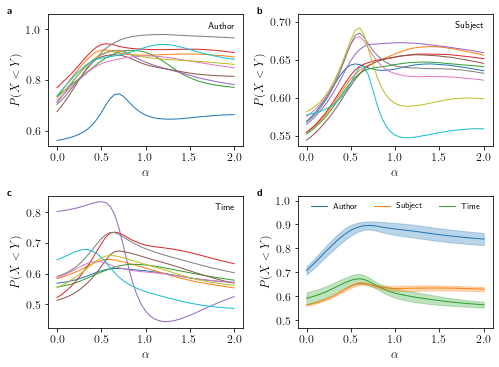

In [14]:
fig, axes = plt.subplots(2,2, figsize=(7,5.2), tight_layout=True)

axes_map = {'author':(0,0),'subject':(0,1),'time':(1,0)}
for task in axes_map:
    i,j = axes_map[task]
    ax = axes[i][j]
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$P(X<Y)$')
    ax.tick_params(labelleft=True)
    # if task == 'subject':
    #     ax2.annotate(r'\textbf{b}',xy=(-0.24,1.0),xycoords = 'axes fraction',)
    # else:
    #     ax2.annotate(r'\textbf{b}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
    tests = [i for i in range(11,21)]
    alphas = [i/20 for i in range(41)]
    
    # Create a figure for each test
    for test in tests:
        input_file_path_opt_alpha = f'../output_files/optimal_alpha_new_controlled_{task}{test}.pickle'
        with open(input_file_path_opt_alpha, 'rb') as f:
            opt_alpha_results = pickle.load(f)
        
        ax.plot(alphas, opt_alpha_results, lw=1)
    
    ycoord = 0.89
    if task == 'author':
        ax.annotate(r'\textbf{a}',xy=(-0.21,1.0),xycoords = 'axes fraction',)
        ax.annotate(r'Author',xy=(0.82,ycoord),xycoords = 'axes fraction',fontsize=9)
        ax.set_ylim(top=1.06)
    elif task == 'subject':
        ax.annotate(r'\textbf{b}',xy=(-0.21,1.0),xycoords = 'axes fraction',)
        ax.annotate(r'Subject',xy=(0.805,ycoord),xycoords = 'axes fraction',fontsize=9)
        ax.set_ylim(top=0.71)
    if task == 'time':
        ax.annotate(r'\textbf{c}',xy=(-0.21,1.0),xycoords = 'axes fraction',)
        ax.annotate(r'Time',xy=(0.855,ycoord),xycoords = 'axes fraction',fontsize=9)

    
ax = axes[1][1]

dataframe_dict_controlled, dataframe_dict = create_avg_se_dict()

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$P(X<Y)$')
ax.tick_params(labelleft=True)
ax.annotate(r'\textbf{d}',xy=(-0.21,1.0),xycoords = 'axes fraction',)
ax.yaxis.set_ticks([0.5,0.6,0.7,0.8,0.9,1])
ax.set_ylim(bottom = 0.47, top=1.02)

tests = [i for i in range(11,21)]
alphas = [i/20 for i in range(41)]

colours = {'author':'C0', 'subject':'C1', 'time':'C2'}
orders = {'author':1, 'subject':3, 'time':2}
for task in ['author','subject', 'time']:
    current = dataframe_dict_controlled[task]
    # ax2.errorbar(alphas, current[0], yerr=current[1], label = task)
    ax.plot(alphas, current[0], label = task.title(), lw=1)
    ax.fill_between(alphas, np.array(current[0]) - np.array(current[1])/np.sqrt(10), 
                    np.array(current[0]) + np.array(current[1])/np.sqrt(10), 
                    color=colours[task], alpha=0.3, zorder = orders[task])
ax.legend(ncol=3, loc = 9, frameon=False)

fig.show()

# fig.savefig("../figures/optimal_alpha_controlled.pdf")

### Using weights proportional to text length, mentioned in paper but not shown

In [15]:
def create_opt_alpha_plot_weights(task): 
    # fig = plt.figure(figsize=(7,2.7), tight_layout=True)
    dataframe_dict_controlled, dataframe_dict = create_avg_se_dict()
    dataframe_dict_controlled_weights, dataframe_dict_weights = create_avg_se_dict(weights=True)

    # ax1 = plt.subplot(121)
    # ax2 = plt.subplot(122)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,2.7), tight_layout=True, sharey=True)

    ###############

    ax1.set_xlabel(r'$\alpha$')
    ax1.set_ylabel(r'$P(X<Y)$')
    
    if task == 'author':
        ax1.yaxis.set_ticks([0.5,0.6,0.7,0.8,0.9,1])
        ax1.set_ylim(bottom = 0.54, top=1.02)
        ax1.annotate(r'\textbf{a}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
        ax2.annotate(r'\textbf{b}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
    elif task == 'subject':
        # ax1.yaxis.set_ticks([0.5,0.6,0.7,0.8,0.9,1])
        ax1.set_ylim(bottom = 0.45, top=0.74)
        ax1.annotate(r'\textbf{c}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
        ax2.annotate(r'\textbf{d}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
    elif task == 'time':
        # ax1.yaxis.set_ticks([0.5,0.6,0.7,0.8,0.9,1])
        ax1.set_ylim(bottom = 0.39, top=0.77)
        ax1.annotate(r'\textbf{e}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
        ax2.annotate(r'\textbf{f}',xy=(-0.2,1.0),xycoords = 'axes fraction',)

    # ax.set_ylim(1,10**5)
    # ax.set_xlim(x[0])
    # ax.xaxis.set_ticks([10**2,10**4,10**6])

    #########

    ax2.set_xlabel(r'$\alpha$')
    ax2.set_ylabel(r'$P(X<Y)$')
    ax2.tick_params(labelleft=True)
    # ax2.annotate(r'\textbf{b}',xy=(-0.2,1.0),xycoords = 'axes fraction',)


    
    tests = [i for i in range(11,21)]
    alphas = [i/20 for i in range(41)]

    # colours = {'author':'C0', 'subject':'C1', 'time':'C2'}
    # orders = {'author':1, 'subject':3, 'time':2}
    current_controlled = dataframe_dict_controlled[task]
    ax1.plot(alphas, current_controlled[0], label = 'Without weights', color='C0')
    ax1.fill_between(alphas, np.array(current_controlled[0]) - np.array(current_controlled[1])/np.sqrt(10), 
                    np.array(current_controlled[0]) + np.array(current_controlled[1])/np.sqrt(10), 
                    color='C0', alpha=0.3)

    current_controlled = dataframe_dict_controlled_weights[task]
    ax1.plot(alphas, current_controlled[0], label = 'With weights ', color='C1')
    ax1.fill_between(alphas, np.array(current_controlled[0]) - np.array(current_controlled[1])/np.sqrt(10), 
                    np.array(current_controlled[0]) + np.array(current_controlled[1])/np.sqrt(10), 
                    color='C1', alpha=0.3)

    current = dataframe_dict[task]
    ax2.plot(alphas, current[0], label = 'Without weights', color='C0')
    ax2.fill_between(alphas, np.array(current[0]) - np.array(current[1])/np.sqrt(10), 
                    np.array(current[0]) + np.array(current[1])/np.sqrt(10), 
                    color='C0', alpha=0.3)
    
    current = dataframe_dict_weights[task]
    ax2.plot(alphas, current[0], label = 'With weights', color='C1')
    ax2.fill_between(alphas, np.array(current[0]) - np.array(current[1])/np.sqrt(10), 
                    np.array(current[0]) + np.array(current[1])/np.sqrt(10), 
                    color='C1', alpha=0.3)

    ax1.legend(ncol=2, loc = 9, frameon=False)
    ax2.legend(ncol=2, loc = 9, frameon=False)
    
    fig.show()

    # fig.savefig(f"../figures/all_alpha_{task}_weights.pdf")

/var/folders/km/9ttg7bls33d_8n560hhmbnr00000gn/T/ipykernel_16034/1310602863.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/km/9ttg7bls33d_8n560hhmbnr00000gn/T/ipykernel_16034/1310602863.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/km/9ttg7bls33d_8n560hhmbnr00000gn/T/ipykernel_16034/1310602863.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


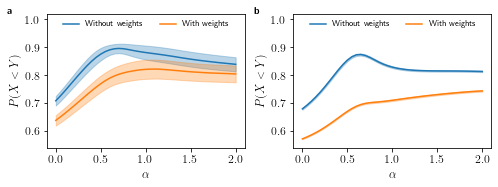

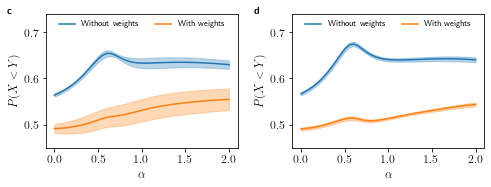

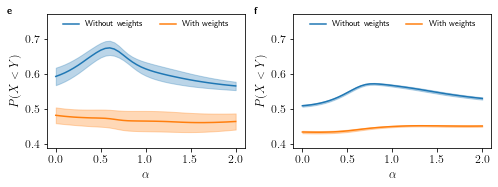

In [16]:
for task in ['author','subject','time']:
    create_opt_alpha_plot_weights(task)